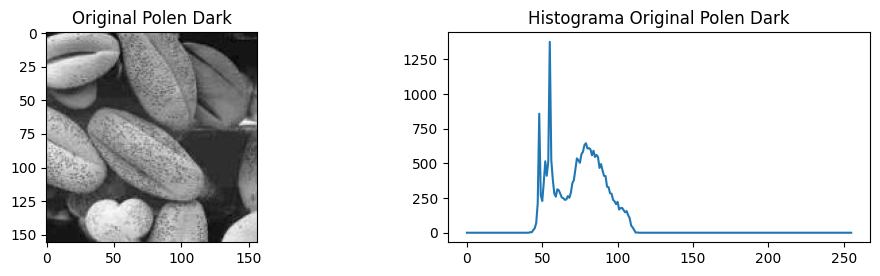

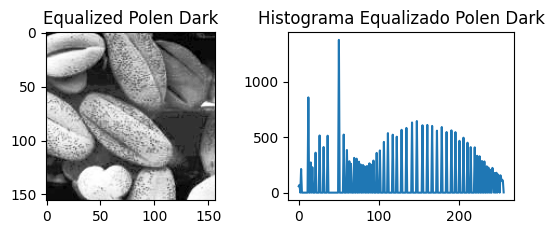

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Função para calcular e visualizar histogramas
def calculate_and_plot_histogram(image, title):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.plot(hist)
    plt.title(title)
    plt.show()

# Função para equalizar a imagem e exibir o resultado
def equalize_and_show(image, title):
    if image is None:
        print(f'Erro: A imagem {title} não foi lida corretamente.')
        return

    # Calcular histograma
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Calcular a função de distribuição acumulada (CDF)
    cdf = np.cumsum(hist)

    # Normalizar a CDF para o intervalo [0, 255]
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Aplicar a equalização usando a CDF normalizada
    equalized_image_flat = np.interp(image.flatten(), bins[:-1], cdf_normalized)

    # Remodelar a imagem equalizada
    equalized_image = equalized_image_flat.reshape(image.shape)

    plt.figure(figsize=(12, 6))

    # Imagem Original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original ' + title)

    # Histograma da Imagem Original
    plt.subplot(2, 2, 2)
    calculate_and_plot_histogram(image, 'Histograma Original ' + title)

    # Imagem Equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized ' + title)

    # Histograma da Imagem Equalizada
    plt.subplot(2, 2, 4)
    calculate_and_plot_histogram(equalized_image, 'Histograma Equalizado ' + title)

    plt.tight_layout()
    plt.show()

# Leitura das Imagens usando OpenCV
polen_dark = cv2.imread('polen_dark.jpeg', cv2.IMREAD_GRAYSCALE)
polen_light = cv2.imread('polen_light.jpeg', cv2.IMREAD_GRAYSCALE)
polen_low_contrast = cv2.imread('polen_low_contrast.jpeg', cv2.IMREAD_GRAYSCALE)
polen_high_contrast = cv2.imread('polen_high_contrast.jpeg', cv2.IMREAD_GRAYSCALE)

# Mostrar Imagens e Histogramas
equalize_and_show(polen_dark, 'Polen Dark')


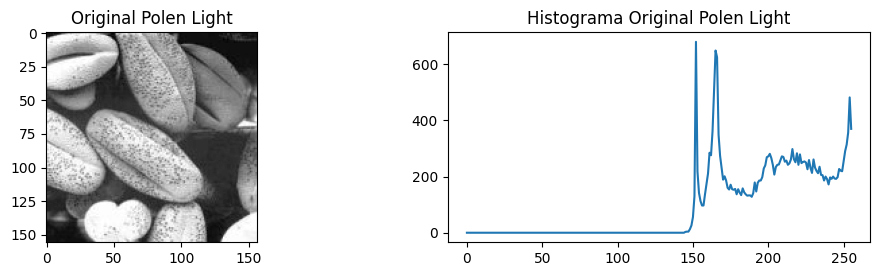

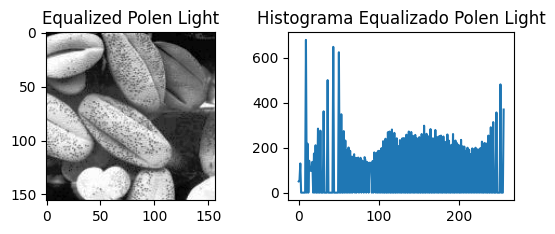

<Figure size 640x480 with 0 Axes>

In [6]:
equalize_and_show(polen_light, 'Polen Light')

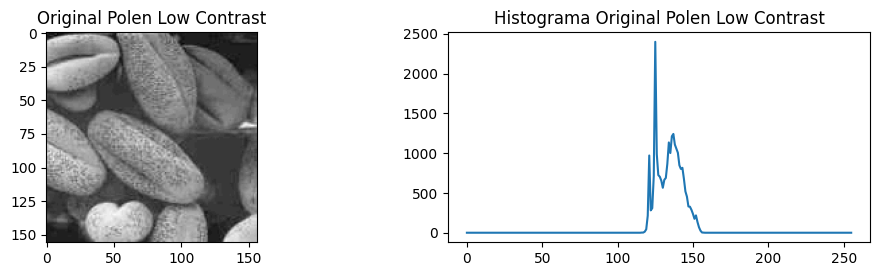

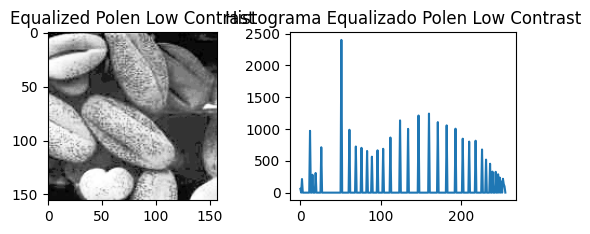

<Figure size 640x480 with 0 Axes>

In [7]:
equalize_and_show(polen_low_contrast, 'Polen Low Contrast')

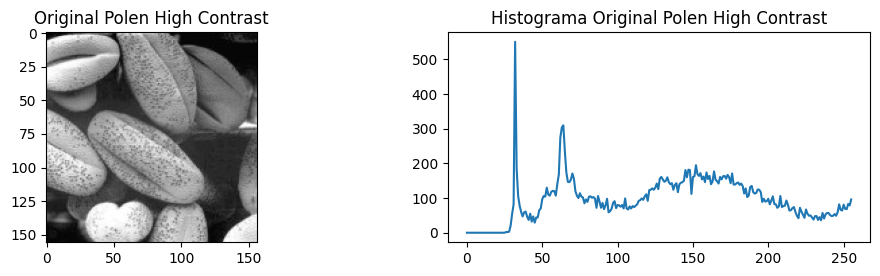

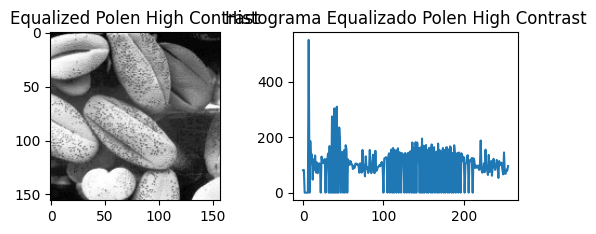

<Figure size 640x480 with 0 Axes>

In [8]:
equalize_and_show(polen_high_contrast, 'Polen High Contrast')